In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
generation_categories_sft = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/generation_categories.npy")
generated_answer_log_probs_sft = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/generated_answer_log_probs_mean_ood.npy")
# generation_categories_ppo = np.load("ckpts/ppo_ctrex_llama7B_commit30_idk10_chunk128/checkpoint_20000/hf_model/generation_categories.npy")
generation_categories_ppo = np.load("ckpts/ppo_ctrex_llama7B_commit50_idk10/best_checkpoint/hf_model/generation_categories.npy")

generation_categories_force_commit_ppo = np.load("ckpts/ppo_ctrex_llama7B_commit50_idk10/best_checkpoint/hf_model/generation_categories_force_commit.npy")
generation_categories_ppo2 = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/generation_categories.npy")
generation_categories_force_commit_ppo2 = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/generation_categories_force_commit.npy")
generation_categories_sft2 = np.load("ckpts/sft2_ctrex_llama7B_commit20_idk10_lr1e-5/checkpoint_30000/hf_model/generation_categories.npy")
generation_categories_sft2_2 = np.load("ckpts/sft2_ctrex_llama7B_commit35_idk10_lr1e-5/checkpoint_30000/hf_model/generation_categories.npy")
generation_categories_sft3 = np.load("ckpts/sft3_ctrex_llama7B/checkpoint_30000/hf_model/generation_categories.npy")

In [9]:
sft2_selective_accuracy = (generation_categories_sft2[:, 1].mean()/(1-generation_categories_sft2[:, 3].mean()))
sft2_selective_accuracy2 = (generation_categories_sft2_2[:, 1].mean()/(1-generation_categories_sft2_2[:, 3].mean()))

In [10]:
sft2_selective_accuracy

0.46630585979964706

In [11]:
sft2_selective_accuracy2

0.3642983251885017

: 

In [4]:
generated_answer_log_probs_sft.shape

(311574,)

Text(0.5, 0, 'SFT Generated Answer Prob')

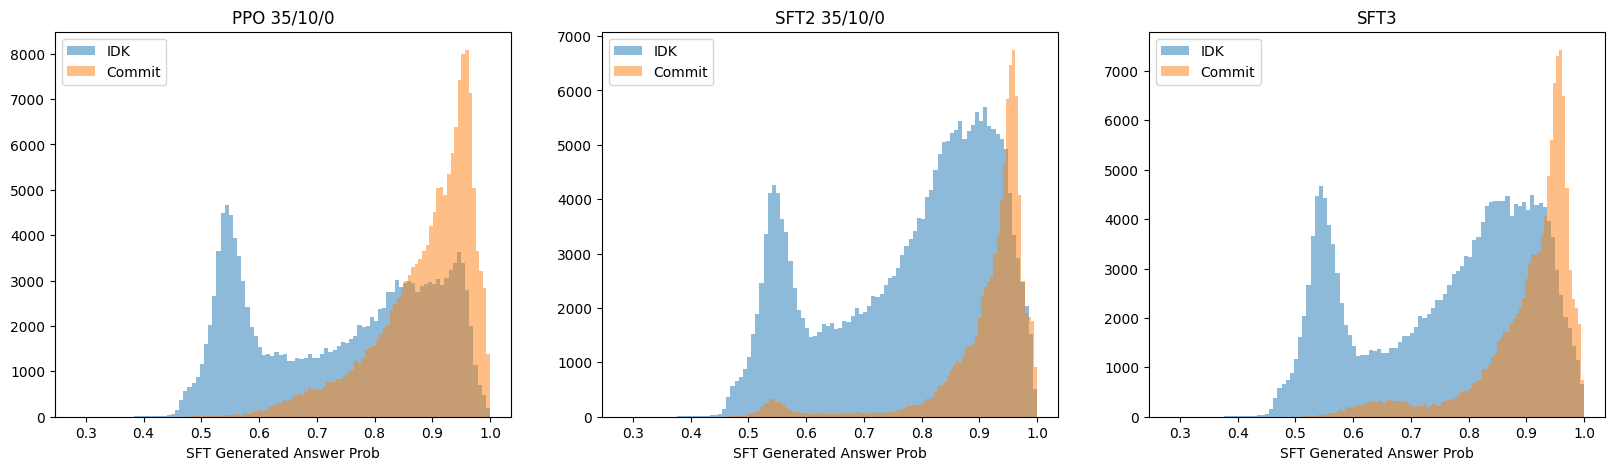

In [5]:
#make 2 subplots

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
idk_idxs = np.where(generation_categories_ppo2[:, 3]==1)[0]
commit_idxs = np.where(generation_categories_ppo2[:, 3]==0)[0]

ax1.hist(np.e**generated_answer_log_probs_sft[idk_idxs], bins=100, alpha=0.5, label="IDK")
ax1.hist(np.e**generated_answer_log_probs_sft[commit_idxs], bins=100, alpha=0.5, label="Commit")
ax1.legend()
ax1.set_title("PPO 35/10/0")
ax1.set_xlabel("SFT Generated Answer Prob")

idk_idxs = np.where(generation_categories_sft2[:, 3]==1)[0]
commit_idxs = np.where(generation_categories_sft2[:, 3]==0)[0]

ax2.hist(np.e**generated_answer_log_probs_sft[idk_idxs], bins=100, alpha=0.5, label="IDK")
ax2.hist(np.e**generated_answer_log_probs_sft[commit_idxs], bins=100, alpha=0.5, label="Commit")
ax2.legend()
ax2.set_title("SFT2 35/10/0")
ax2.set_xlabel("SFT Generated Answer Prob")


idk_idxs = np.where(generation_categories_sft3[:, 3]==1)[0]
commit_idxs = np.where(generation_categories_sft3[:, 3]==0)[0]

ax3.hist(np.e**generated_answer_log_probs_sft[idk_idxs], bins=100, alpha=0.5, label="IDK")
ax3.hist(np.e**generated_answer_log_probs_sft[commit_idxs], bins=100, alpha=0.5, label="Commit")
ax3.legend()
ax3.set_title("SFT3")
ax3.set_xlabel("SFT Generated Answer Prob")

In [6]:
files = ["ood_points_0", "ood_points_1_2", "ood_points_3_8", "ood_points_9_32", "ood_points_33+"]
num_mentions = ["0", "1-2", "3-8", "9-32", "33+"]
files = ["custom_trex/"+f+".npy" for f in files]

In [7]:
sft_accuracies = []
sft_idk_fracs = []

tsft_accuracies = []
tsft_selective_accuracies = []
tsft_idk_fracs = []

tsft_accuracies2 = []
tsft_selective_accuracies2 = []
tsft_idk_fracs2 = []

ppo_accuracies = []
ppo_accuracies_force_commit = []
ppo_selective_accuracies = []
ppo_idk_fracs = []

ppo_accuracies2 = []
ppo_accuracies_force_commit2 = []
ppo_selective_accuracies2 = []
ppo_idk_fracs2 = []

sft2_accuracies = []
sft2_accuracies2 = []
sft3_accuracies = []

sft2_selective_accuracies = []
sft2_selective_accuracies2 = []
sft3_selective_accuracies = []

sft2_idk_fracs = []
sft2_idk_fracs2 = []
sft3_idk_fracs = []


for i in range(len(files)):
    idxs = np.load(files[i])
    sft_accuracy = (generation_categories_sft[idxs, 1].mean())
    ppo_accuracy = (generation_categories_ppo[idxs, 1].mean())
    ppo_accuracy_force_commit = (generation_categories_force_commit_ppo[idxs, 1].mean())
    sft_idk_frac = (generation_categories_sft[idxs, 3].mean())
    sft_idk_fracs.append(sft_idk_frac)
    ppo_selective_accuracy = (generation_categories_ppo[idxs, 1].mean()/(1-generation_categories_ppo[idxs, 3].mean()))
    ppo_idk_frac = (generation_categories_ppo[idxs, 3].mean())
    sft_accuracies.append(sft_accuracy)
    ppo_accuracies.append(ppo_accuracy)
    ppo_accuracies_force_commit.append(ppo_accuracy_force_commit)
    ppo_selective_accuracies.append(ppo_selective_accuracy)
    ppo_idk_fracs.append(ppo_idk_frac)


    tsft_commit_idxs = np.where(np.e**generated_answer_log_probs_sft[idxs]>0.81)[0]
    tsft_idk_idxs = np.where(np.e**generated_answer_log_probs_sft[idxs]<=0.81)[0]
    tsft_accuracy = (generation_categories_sft[idxs[tsft_commit_idxs], 1].sum())/len(idxs)
    tsft_idk_frac = (len(tsft_idk_idxs)/len(idxs))
    tsft_selective_accuracy = (tsft_accuracy/(1-tsft_idk_frac))
    tsft_accuracies.append(tsft_accuracy)
    tsft_selective_accuracies.append(tsft_selective_accuracy)
    tsft_idk_fracs.append(tsft_idk_frac)

    tsft_commit_idxs2 = np.where(np.e**generated_answer_log_probs_sft[idxs]>0.85)[0]
    tsft_idk_idxs2 = np.where(np.e**generated_answer_log_probs_sft[idxs]<=0.85)[0]
    tsft_accuracy2 = (generation_categories_sft[idxs[tsft_commit_idxs2], 1].sum())/len(idxs)
    tsft_idk_frac2 = (len(tsft_idk_idxs2)/len(idxs))
    tsft_selective_accuracy2 = (tsft_accuracy2/(1-tsft_idk_frac2))
    tsft_accuracies2.append(tsft_accuracy2)
    tsft_selective_accuracies2.append(tsft_selective_accuracy2)
    tsft_idk_fracs2.append(tsft_idk_frac2)


    ppo_accuracy2 = (generation_categories_ppo2[idxs, 1].mean())
    ppo_accuracy_force_commit2 = (generation_categories_force_commit_ppo2[idxs, 1].mean())
    ppo_selective_accuracy2 = (generation_categories_ppo2[idxs, 1].mean()/(1-generation_categories_ppo2[idxs, 3].mean()))
    ppo_idk_frac2 = (generation_categories_ppo2[idxs, 3].mean())
    ppo_accuracies2.append(ppo_accuracy2)
    ppo_accuracies_force_commit2.append(ppo_accuracy_force_commit2)
    ppo_selective_accuracies2.append(ppo_selective_accuracy2)
    ppo_idk_fracs2.append(ppo_idk_frac2)

    sft2_accuracy = (generation_categories_sft2[idxs, 1].mean())
    sft2_accuracy2 = (generation_categories_sft2_2[idxs, 1].mean())
    sft3_accuracy = (generation_categories_sft3[idxs, 1].mean())
    sft2_accuracies.append(sft2_accuracy)
    sft2_accuracies2.append(sft2_accuracy2)
    sft3_accuracies.append(sft3_accuracy)

    sft2_selective_accuracy = (generation_categories_sft2[idxs, 1].mean()/(1-generation_categories_sft2[idxs, 3].mean()))
    sft2_selective_accuracy2 = (generation_categories_sft2_2[idxs, 1].mean()/(1-generation_categories_sft2_2[idxs, 3].mean()))
    sft3_selective_accuracy = (generation_categories_sft3[idxs, 1].mean()/(1-generation_categories_sft3[idxs, 3].mean()))
    sft2_selective_accuracies.append(sft2_selective_accuracy)
    sft2_selective_accuracies2.append(sft2_selective_accuracy2)
    sft3_selective_accuracies.append(sft3_selective_accuracy)

    sft2_idk_frac = (generation_categories_sft2[idxs, 3].mean())
    sft2_idk_frac2 = (generation_categories_sft2_2[idxs, 3].mean())
    sft3_idk_frac = (generation_categories_sft3[idxs, 3].mean())
    sft2_idk_fracs.append(sft2_idk_frac)
    sft2_idk_fracs2.append(sft2_idk_frac2)
    sft3_idk_fracs.append(sft3_idk_frac)


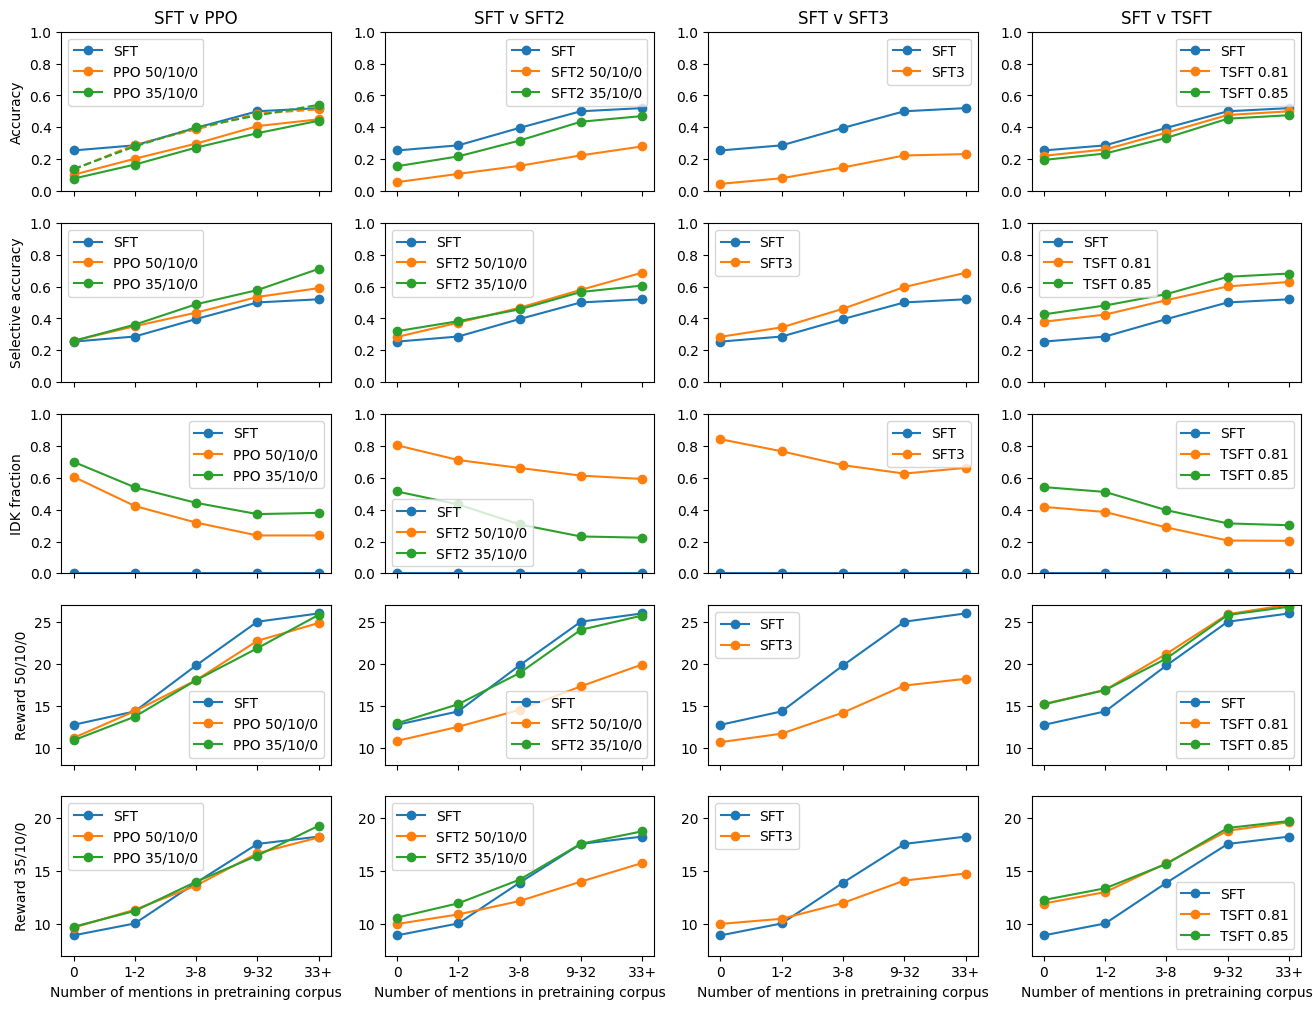

In [8]:
# make 2 subplots vertical
fig, axs = plt.subplots(5, 4, figsize=(12/3*4, 12), sharex=True,)


axs[0][0].plot(sft_accuracies, "o-", label="SFT")
axs[0][0].plot(ppo_accuracies, "o-", label="PPO 50/10/0")
axs[0][0].plot(ppo_accuracies2, "o-", label="PPO 35/10/0")
axs[0][0].plot(ppo_accuracies_force_commit, "o--", c = "C1")
axs[0][0].plot(ppo_accuracies_force_commit2, "o--", c = "C2")
axs[0][0].set_ylabel("Accuracy")
axs[0][0].legend()
axs[0][0].set_title("SFT v PPO")
axs[0][0].set_ylim(0, 1)

axs[0][1].plot(sft_accuracies, "o-", label="SFT")
axs[0][1].plot(sft2_accuracies, "o-", label="SFT2 50/10/0")
axs[0][1].plot(sft2_accuracies2, "o-", label="SFT2 35/10/0")
axs[0][1].legend()
axs[0][1].set_title("SFT v SFT2")
axs[0][1].set_ylim(0, 1)


axs[0][2].plot(sft_accuracies, "o-", label="SFT")
axs[0][2].plot(sft3_accuracies, "o-", label="SFT3")
axs[0][2].legend()
axs[0][2].set_title("SFT v SFT3")
axs[0][2].set_ylim(0, 1)



axs[1][0].plot(sft_accuracies, "o-", label="SFT")
axs[1][0].plot(ppo_selective_accuracies, "o-", label="PPO 50/10/0")
axs[1][0].plot(ppo_selective_accuracies2, "o-", label="PPO 35/10/0")
axs[1][0].set_ylabel("Selective accuracy")
axs[1][0].legend()
axs[1][0].set_ylim(0, 1)


axs[1][1].plot(sft_accuracies, "o-", label="SFT")
axs[1][1].plot(sft2_selective_accuracies, "o-", label="SFT2 50/10/0")
axs[1][1].plot(sft2_selective_accuracies2, "o-", label="SFT2 35/10/0")
axs[1][1].legend()
axs[1][1].set_ylim(0, 1)


axs[1][2].plot(sft_accuracies, "o-", label="SFT")
axs[1][2].plot(sft3_selective_accuracies, "o-", label="SFT3")
axs[1][2].legend()
axs[1][2].set_ylim(0, 1)



axs[2][0].plot(sft_idk_fracs, "o-", label="SFT")
axs[2][0].plot(ppo_idk_fracs, "o-", label="PPO 50/10/0")
axs[2][0].plot(ppo_idk_fracs2, "o-", label="PPO 35/10/0")
axs[2][0].set_ylabel("IDK fraction")
axs[2][0].legend()
axs[2][0].set_ylim(0, 1)


axs[2][1].plot(sft_idk_fracs, "o-", label="SFT")
axs[2][1].plot(sft2_idk_fracs, "o-", label="SFT2 50/10/0")
axs[2][1].plot(sft2_idk_fracs2, "o-", label="SFT2 35/10/0")
axs[2][1].legend()
axs[2][1].set_ylim(0, 1)


axs[2][2].plot(sft_idk_fracs, "o-", label="SFT")
axs[2][2].plot(sft3_idk_fracs, "o-", label="SFT3")
axs[2][2].legend()
axs[2][2].set_ylim(0, 1)



axs[3][0].plot(np.array(sft_accuracies)*50+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[3][0].plot(np.array(ppo_accuracies)*50+np.array(ppo_idk_fracs)*10, "o-", label="PPO 50/10/0")
axs[3][0].plot(np.array(ppo_accuracies2)*50+np.array(ppo_idk_fracs2)*10, "o-", label="PPO 35/10/0")
axs[3][0].set_ylabel("Reward 50/10/0")
axs[3][0].legend()
axs[3][0].set_ylim(8, 27)

axs[3][1].plot(np.array(sft_accuracies)*50+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[3][1].plot(np.array(sft2_accuracies)*50+np.array(sft2_idk_fracs)*10, "o-", label="SFT2 50/10/0")
axs[3][1].plot(np.array(sft2_accuracies2)*50+np.array(sft2_idk_fracs2)*10, "o-", label="SFT2 35/10/0")
axs[3][1].legend()
axs[3][1].set_ylim(8, 27)


axs[3][2].plot(np.array(sft_accuracies)*50+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[3][2].plot(np.array(sft3_accuracies)*50+np.array(sft3_idk_fracs)*10, "o-", label="SFT3")
axs[3][2].legend()
axs[3][2].set_ylim(8, 27)


axs[4][0].plot(np.array(sft_accuracies)*35+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[4][0].plot(np.array(ppo_accuracies)*35+np.array(ppo_idk_fracs)*10, "o-", label="PPO 50/10/0")
axs[4][0].plot(np.array(ppo_accuracies2)*35+np.array(ppo_idk_fracs2)*10, "o-", label="PPO 35/10/0")
axs[4][0].set_ylabel("Reward 35/10/0")
axs[4][0].legend()
axs[4][0].set_ylim(7, 22)
axs[4][0].set_xticks(np.arange(len(num_mentions)))
axs[4][0].set_xticklabels(num_mentions)
axs[4][0].set_xlabel("Number of mentions in pretraining corpus")

axs[4][1].plot(np.array(sft_accuracies)*35+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[4][1].plot(np.array(sft2_accuracies)*35+np.array(sft2_idk_fracs)*10, "o-", label="SFT2 50/10/0")
axs[4][1].plot(np.array(sft2_accuracies2)*35+np.array(sft2_idk_fracs2)*10, "o-", label="SFT2 35/10/0")
axs[4][1].legend()
axs[4][1].set_ylim(7, 22)
axs[4][1].set_xticks(np.arange(len(num_mentions)))
axs[4][1].set_xticklabels(num_mentions)
axs[4][1].set_xlabel("Number of mentions in pretraining corpus")


axs[4][2].plot(np.array(sft_accuracies)*35+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[4][2].plot(np.array(sft3_accuracies)*35+np.array(sft3_idk_fracs)*10, "o-", label="SFT3")
axs[4][2].legend()
axs[4][2].set_ylim(7, 22)
axs[4][2].set_xticks(np.arange(len(num_mentions)))
axs[4][2].set_xticklabels(num_mentions)
axs[4][2].set_xlabel("Number of mentions in pretraining corpus")


axs[0][3].plot(sft_accuracies, "o-", label="SFT")
axs[0][3].plot(tsft_accuracies, "o-", label="TSFT 0.81")
axs[0][3].plot(tsft_accuracies2, "o-", label="TSFT 0.85")
axs[0][3].set_title("SFT v TSFT")
axs[0][3].legend()
axs[0][3].set_ylim(0, 1)

axs[1][3].plot(sft_accuracies, "o-", label="SFT")
axs[1][3].plot(tsft_selective_accuracies, "o-", label="TSFT 0.81")
axs[1][3].plot(tsft_selective_accuracies2, "o-", label="TSFT 0.85")
axs[1][3].legend()
axs[1][3].set_ylim(0, 1)

axs[2][3].plot(sft_idk_fracs, "o-", label="SFT")
axs[2][3].plot(tsft_idk_fracs, "o-", label="TSFT 0.81")
axs[2][3].plot(tsft_idk_fracs2, "o-", label="TSFT 0.85")
axs[2][3].legend()
axs[2][3].set_ylim(0, 1)

axs[3][3].plot(np.array(sft_accuracies)*50+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[3][3].plot(np.array(tsft_accuracies)*50+np.array(tsft_idk_fracs)*10, "o-", label="TSFT 0.81")
axs[3][3].plot(np.array(tsft_accuracies2)*50+np.array(tsft_idk_fracs2)*10, "o-", label="TSFT 0.85")
axs[3][3].legend()
axs[3][3].set_ylim(8, 27)

axs[4][3].plot(np.array(sft_accuracies)*35+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[4][3].plot(np.array(tsft_accuracies)*35+np.array(tsft_idk_fracs)*10, "o-", label="TSFT 0.81")
axs[4][3].plot(np.array(tsft_accuracies2)*35+np.array(tsft_idk_fracs2)*10, "o-", label="TSFT 0.85")
axs[4][3].legend()
axs[4][3].set_ylim(7, 22)
axs[4][3].set_xticks(np.arange(len(num_mentions)))
axs[4][3].set_xticklabels(num_mentions)
axs[4][3].set_xlabel("Number of mentions in pretraining corpus")

plt.savefig("fig.png")



# ax1.plot(sft_accuracies, "o-", label="SFT accuracy")
# ax1.plot(ppo_selective_accuracies, "o-",label="PPO selective accuracy")
# ax1.plot(ppo_selective_accuracies2, "o-",label="PPO selective accuracy (2)")
# ax1.plot(sft2_selective_accuracies, "o-",label="SFT2 selective accuracy")
# ax1.plot(sft2_selective_accuracies2, "o-",label="SFT2 selective accuracy (2)")
# ax1.plot(sft3_selective_accuracies, "o-",label="SFT3 selective accuracy")

# ax1.set_ylim(0, 1)
# ax1.legend()

# ax2.plot(ppo_idk_fracs, "o-",label="PPO IDK fraction")
# ax2.plot(ppo_idk_fracs2, "o-",label="PPO IDK fraction (2)")
# ax2.plot(sft2_idk_fracs, "o-",label="SFT2 IDK fraction")
# ax2.plot(sft2_idk_fracs2, "o-",label="SFT2 IDK fraction (2)")
# ax2.plot(sft3_idk_fracs, "o-",label="SFT3 IDK fraction")
# ax2.set_ylim(0, 1)
# ax2.legend()

# ax2.set_xticks(np.arange(len(num_mentions)))
# ax2.set_xticklabels(num_mentions)
# ax2.set_xlabel("Number of mentions in pretraining corpus")


Text(0.5, 0, 'IDK fraction')

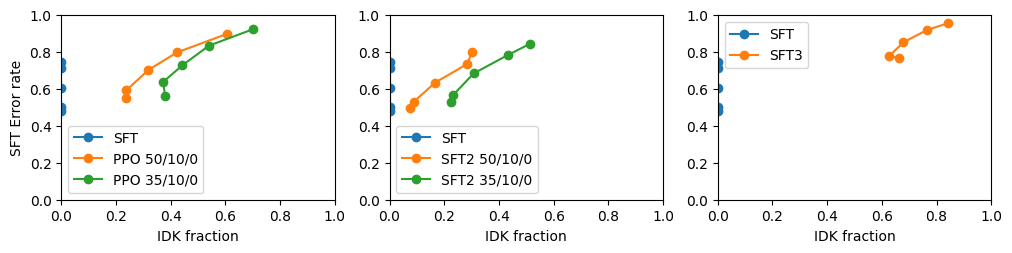

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(12, 12/5), sharex=True,)
axs[0].plot(sft_idk_fracs, 1-np.array(sft_accuracies), "o-", label="SFT")
axs[0].plot(ppo_idk_fracs, 1-np.array(ppo_accuracies), "o-", label="PPO 50/10/0")
axs[0].plot(ppo_idk_fracs2, 1-np.array(ppo_accuracies2), "o-", label="PPO 35/10/0")
axs[0].set_ylabel("SFT Error rate")
axs[0].legend()
axs[0].set_ylim(0, 1)
axs[0].set_xlim(0, 1)
axs[0].set_xlabel("IDK fraction")

axs[1].plot(sft_idk_fracs, 1-np.array(sft_accuracies), "o-", label="SFT")
axs[1].plot(sft2_idk_fracs, 1-np.array(sft2_accuracies), "o-", label="SFT2 50/10/0")
axs[1].plot(sft2_idk_fracs2, 1-np.array(sft2_accuracies2), "o-", label="SFT2 35/10/0")
axs[1].legend()
axs[1].set_ylim(0, 1)
axs[1].set_xlim(0, 1)
axs[1].set_xlabel("IDK fraction")

axs[2].plot(sft_idk_fracs, 1-np.array(sft_accuracies), "o-", label="SFT")
axs[2].plot(sft3_idk_fracs, 1-np.array(sft3_accuracies), "o-", label="SFT3")
axs[2].legend()
axs[2].set_ylim(0, 1)
axs[2].set_xlim(0, 1)
axs[2].set_xlabel("IDK fraction")


<BarContainer object of 5 artists>

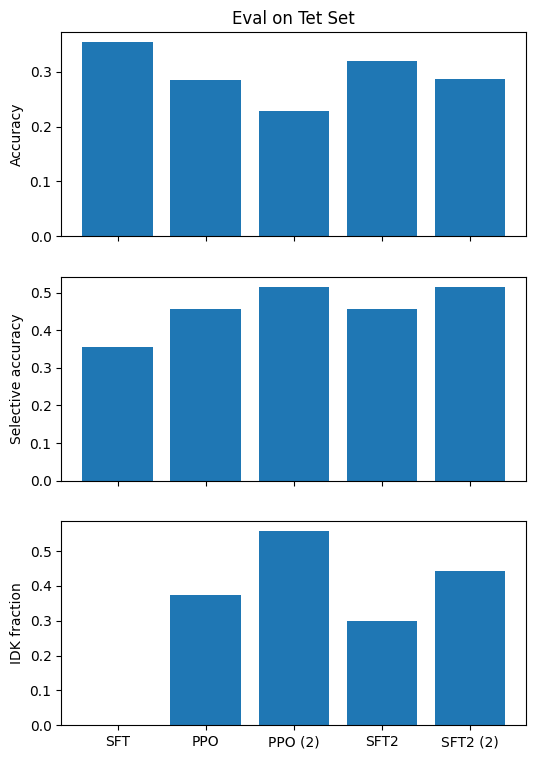

In [35]:
#make 3 subplots

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 9), sharex=True)

ax1.set_ylabel("Accuracy")
acccuracies = [generation_categories_sft_test[:, 1].mean(), generation_categories_ppo_test[:, 1].mean(), generation_categories_ppo2_test[:, 1].mean(), generation_categories_sft2_test[:, 1].mean(), generation_categories_sft2_2_test[:, 1].mean()]
ax1.bar(np.arange(len(acccuracies)), acccuracies, tick_label=["SFT", "PPO", "PPO (2)", "SFT2", "SFT2 (2)"])
ax1.set_title("Eval on Tet Set")


ax2.set_ylabel("Selective accuracy")
selective_accuracies = [generation_categories_sft_test[:, 1].mean()/(1-generation_categories_sft_test[:, 3].mean()), generation_categories_ppo_test[:, 1].mean()/(1-generation_categories_ppo_test[:, 3].mean()), generation_categories_ppo2_test[:, 1].mean()/(1-generation_categories_ppo2_test[:, 3].mean()), generation_categories_sft2_test[:, 1].mean()/(1-generation_categories_sft2_test[:, 3].mean()), generation_categories_sft2_2_test[:, 1].mean()/(1-generation_categories_sft2_2_test[:, 3].mean())]
ax2.bar(np.arange(len(selective_accuracies)), selective_accuracies, tick_label=["SFT", "PPO", "PPO (2)", "SFT2", "SFT2 (2)"])

ax3.set_ylabel("IDK fraction")
idk_fracs = [generation_categories_sft_test[:, 3].mean(), generation_categories_ppo_test[:, 3].mean(), generation_categories_ppo2_test[:, 3].mean(), generation_categories_sft2_test[:, 3].mean(), generation_categories_sft2_2_test[:, 3].mean()]
ax3.bar(np.arange(len(idk_fracs)), idk_fracs, tick_label=["SFT", "PPO", "PPO (2)", "SFT2", "SFT2 (2)"])


In [3]:
generation_categories_sft = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/generation_categories.npy")
generated_answer_log_probs_sft = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/generated_answer_log_probs_mean_ood.npy")
generation_categories_ppo = np.load("ckpts/ppo_ctrex_llama7B_commit30_idk10_chunk128/checkpoint_20000/hf_model/generation_categories.npy")


In [4]:
files = ["ood_points_0", "ood_points_1_2", "ood_points_3_8", "ood_points_9_32", "ood_points_33+"]
num_mentions = ["0", "1-2", "3-8", "9-32", "33+"]
files = ["custom_trex/"+f+".npy" for f in files]

In [6]:
sft_accuracies = []
sft_idk_fracs = []


ppo_accuracies = []
ppo_idk_fracs = []
ppo_selective_accuracies = []


for i in range(len(files)):
    idxs = np.load(files[i])
    sft_accuracy = (generation_categories_sft[idxs, 1].mean())
    ppo_accuracy = (generation_categories_ppo[idxs, 1].mean())
    sft_idk_frac = (generation_categories_sft[idxs, 3].mean())
    sft_idk_fracs.append(sft_idk_frac)
    ppo_selective_accuracy = (generation_categories_ppo[idxs, 1].mean()/(1-generation_categories_ppo[idxs, 3].mean()))
    ppo_idk_frac = (generation_categories_ppo[idxs, 3].mean())
    sft_accuracies.append(sft_accuracy)
    ppo_accuracies.append(ppo_accuracy)
    ppo_selective_accuracies.append(ppo_selective_accuracy)
    ppo_idk_fracs.append(ppo_idk_frac)

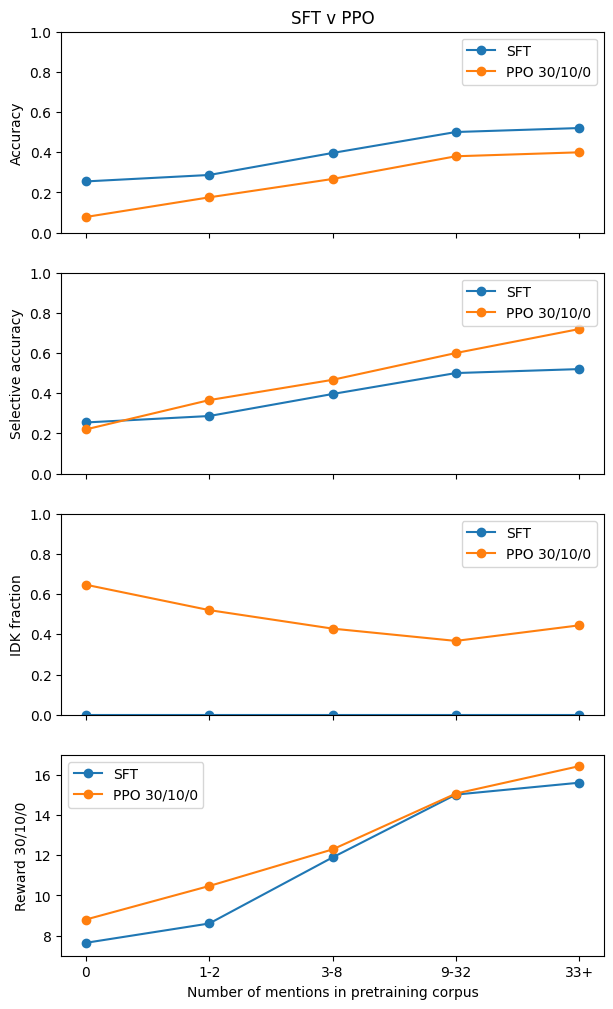

In [14]:
# make 2 subplots vertical
fig, axs = plt.subplots(4, 1, figsize=(7, 12), sharex=True,)


axs[0].plot(sft_accuracies, "o-", label="SFT")
axs[0].plot(ppo_accuracies, "o-", label="PPO 30/10/0")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("SFT v PPO")
axs[0].set_ylim(0, 1)


axs[1].plot(sft_accuracies, "o-", label="SFT")
axs[1].plot(ppo_selective_accuracies, "o-", label="PPO 30/10/0")
axs[1].set_ylabel("Selective accuracy")
axs[1].legend()
axs[1].set_ylim(0, 1)


axs[2].plot(sft_idk_fracs, "o-", label="SFT")
axs[2].plot(ppo_idk_fracs, "o-", label="PPO 30/10/0")
axs[2].set_ylabel("IDK fraction")
axs[2].legend()
axs[2].set_ylim(0, 1)

axs[3].plot(np.array(sft_accuracies)*30+np.array(sft_idk_fracs)*10, "o-", label="SFT")
axs[3].plot(np.array(ppo_accuracies)*30+np.array(ppo_idk_fracs)*10, "o-", label="PPO 30/10/0")
axs[3].set_ylabel("Reward 30/10/0")
axs[3].legend()
axs[3].set_ylim(7, 17)

axs[3].set_xticks(np.arange(len(num_mentions)))
axs[3].set_xticklabels(num_mentions)
axs[3].set_xlabel("Number of mentions in pretraining corpus")

plt.savefig("fig.png")
